<a href="https://colab.research.google.com/github/DeisyData/Portafolio/blob/main/_NGram_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Paso 1. Cargar Datos

In [ ]:
# Cargar datos
data = pd.read_csv('twitter.csv')

# Mostrar primeras filas
print(data.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [ ]:
# Limpiar texto
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Eliminar menciones
    text = re.sub(r'http\S+', '', text)         # Eliminar URLs
    text = re.sub(r'#', '', text)              # Eliminar hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)    # Eliminar caracteres especiales
    text = text.lower().strip()                # Convertir a minúsculas
    return text

data['clean_tweet'] = data['tweet'].apply(clean_text)

# Paso 2. Tokenizacion y elminicación de stop words

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenizar y eliminar stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data['tokens'] = data['clean_tweet'].apply(preprocess)

# Paso 3. N-gram

In [ ]:
# Crear N-grams y contar su frecuencia
def generate_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)

In [ ]:
# Unigrams, bigrams y trigrams
all_tokens = [token for tokens in data['tokens'] for token in tokens]
unigrams = generate_ngrams(all_tokens, 1)
bigrams = generate_ngrams(all_tokens, 2)
trigrams = generate_ngrams(all_tokens, 3)

# Mostrar los 10 más frecuentes
print("Top 10 Unigrams:", unigrams.most_common(10))
print("Top 10 Bigrams:", bigrams.most_common(10))
print("Top 10 Trigrams:", trigrams.most_common(10))

Top 10 Unigrams: [(('love',), 2726), (('day',), 2290), (('happy',), 1691), (('amp',), 1608), (('im',), 1157), (('u',), 1148), (('life',), 1127), (('time',), 1126), (('like',), 1053), (('today',), 1008)]
Top 10 Bigrams: [(('fathers', 'day'), 614), (('thankful', 'positive'), 404), (('positive', 'affirmation'), 352), (('love', 'u'), 347), (('cant', 'wait'), 335), (('u', 'take'), 327), (('take', 'u'), 326), (('u', 'time'), 326), (('model', 'love'), 325), (('time', 'ur'), 325)]
Top 10 Trigrams: [(('model', 'love', 'u'), 325), (('love', 'u', 'take'), 325), (('u', 'take', 'u'), 325), (('take', 'u', 'time'), 325), (('u', 'time', 'ur'), 325), (('iam', 'positive', 'affirmation'), 304), (('blog', 'silver', 'gold'), 284), (('silver', 'gold', 'forex'), 263), (('bull', 'dominate', 'bull'), 175), (('dominate', 'bull', 'direct'), 175)]


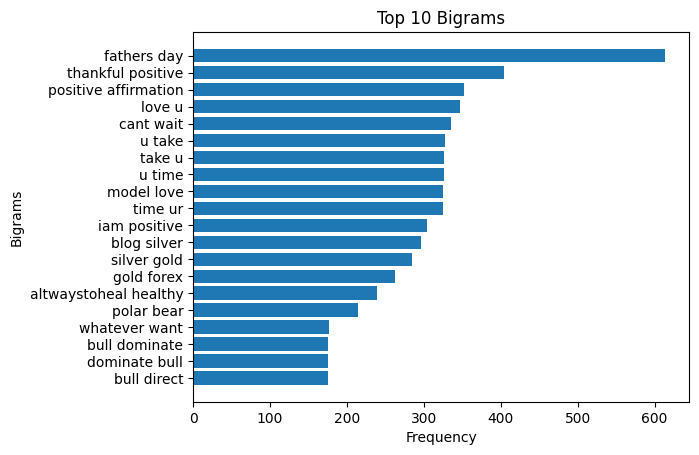

In [ ]:
# Visualizar bigrams más frecuentes
bigrams_freq = bigrams.most_common(20)
bigram_words, bigram_counts = zip(*bigrams_freq)

plt.barh([' '.join(bigram) for bigram in bigram_words], bigram_counts)
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 10 Bigrams")
plt.gca().invert_yaxis()
plt.show()

# Paso 4. Collocations

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Encontrar colocaciones usando Bigram Collocation Finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens)

# Filtrar bigramas que aparecen menos de 3 veces
finder.apply_freq_filter(200) # los 16 bigramas que se repiten al menos 200 veces

# Calcular métricas de colocación
collocations = finder.nbest(bigram_measures.pmi, 10)
print("Top 10 Collocations (PMI):", collocations)

Top 10 Collocations (PMI): [('polar', 'bear'), ('gold', 'forex'), ('silver', 'gold'), ('blog', 'silver'), ('altwaystoheal', 'healthy'), ('iam', 'positive'), ('positive', 'affirmation'), ('cant', 'wait'), ('time', 'ur'), ('thankful', 'positive')]


¿ Cómo eliminamos los términos irrelevantes?

In [ ]:
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si no lo has hecho
nltk.download('stopwords')
nltk.download('words')

# Lista de palabras comunes en inglés
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

# Filtrar nombres propios y palabras no reconocidas
def is_valid_word(word):
    return word in english_vocab

data['filtered_tokens'] = data['tokens'].apply(lambda tokens: [word for word in tokens if is_valid_word(word)])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def clean_tokens(tokens):
    return [word for word in tokens if not word.startswith(('@', '#'))]

data['filtered_tokens'] = data['filtered_tokens'].apply(clean_tokens)

In [ ]:
# Contar frecuencia de todas las palabras
from collections import Counter

all_words = [word for tokens in data['filtered_tokens'] for word in tokens]
word_counts = Counter(all_words)

# Filtrar palabras con frecuencia mayor a un umbral (por ejemplo, 3)
def filter_low_freq(tokens, min_freq=1):
    return [word for word in tokens if word_counts[word] >= min_freq]

data['filtered_tokens'] = data['filtered_tokens'].apply(lambda tokens: filter_low_freq(tokens))


In [ ]:
data['filtered_tokens'].head(10)

,filtered_tokens
0,"[father, selfish, kids, dysfunction, run]"
1,"[thanks, credit, cant, use, cause, dont, offer]"
2,[majesty]
3,"[model, love, u, take, u, time, ur]"
4,"[society, motivation]"
5,"[huge, fan, fare, big, talking, leave, chaos, ..."
6,"[tomorrow, danny]"
7,"[next, school, year, year, cant, think, school..."
8,"[love, land]"
9,[welcome]


In [ ]:
from nltk.util import ngrams
from collections import Counter

# Recalcular bigrams
def generate_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)

all_filtered_tokens = [token for tokens in data['filtered_tokens'] for token in tokens]
bigrams_filtered = generate_ngrams(all_filtered_tokens, 2)

# Mostrar los 10 bigrams más frecuentes
print("Top 10 Bigrams (Filtrados):", bigrams_filtered.most_common(10))

Top 10 Bigrams (Filtrados): [(('thankful', 'positive'), 426), (('positive', 'affirmation'), 352), (('love', 'u'), 347), (('cant', 'wait'), 340), (('u', 'take'), 327), (('take', 'u'), 326), (('u', 'time'), 326), (('model', 'love'), 325), (('time', 'ur'), 325), (('silver', 'gold'), 285)]


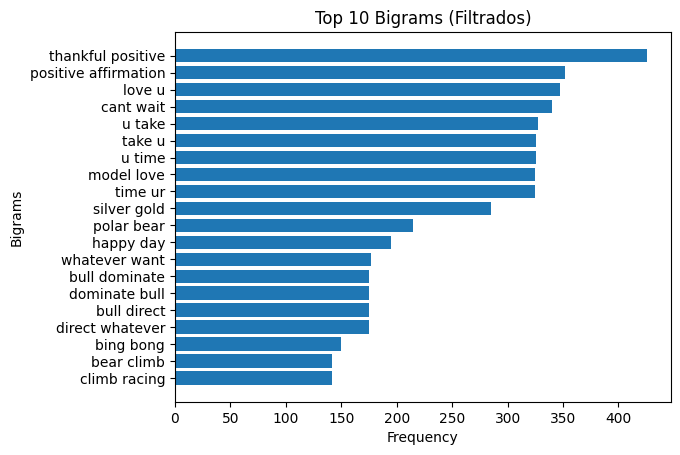

In [ ]:
# Visualizar bigrams más frecuentes después de filtrado
bigrams_freq_filtered = bigrams_filtered.most_common(20)
bigram_words_filtered, bigram_counts_filtered = zip(*bigrams_freq_filtered)

plt.barh([' '.join(bigram) for bigram in bigram_words_filtered], bigram_counts_filtered)
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 10 Bigrams (Filtrados)")
plt.gca().invert_yaxis()
plt.show()